In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time

train_data = np.load('MNIST/train_data.npy')
train_labels = np.load('MNIST/train_labels.npy')

test_data = np.load('MNIST/test_data.npy')
test_labels = np.load('MNIST/test_labels.npy')

In [4]:
train_data.shape

(7500, 784)

In [9]:
test_data.shape

(1000, 784)

In [10]:
train_labels.shape

(7500,)

In [11]:
test_labels.shape

(1000,)

In [27]:
def euclidean_distance(x,y):
    return np.sum(np.square(x-y))

print euclidean_distance(train_data[4,],train_data[5,])

5357193.0


In [7]:
def show_digit(img):
    plt.axis('off')
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray)
    plt.show()
    return

def vis_image(index, dataset='train'):
    if dataset == 'train':
        show_digit(train_data[index,])
        label = train_labels[index]
    else:
        show_digit(test_data[index,])
        label = test_labels[index]
    print 'label = ',str(label)
    return

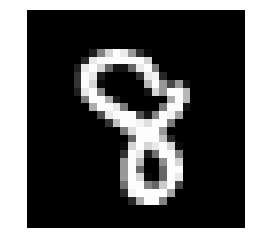

label =  8


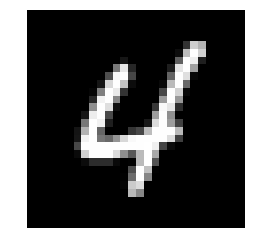

label =  4


In [8]:
vis_image(100)

vis_image(100,'test')

In [51]:
def knn_classifier(train,test,train_label,k=3):
    distance = []
    vote = {} 
    for index in range(len(train)):
        l2_distance = euclidean_distance(test,train[index,])
        distance.append([index,l2_distance])
    distance = sorted(distance,key=lambda d : d[1])
    
    neighbours = distance[:k]
    
    for neighbour in neighbours:
        if train_label[neighbour[0]] not in vote:
             vote[train_label[neighbour[0]]] = 1
        else:
             vote[train_label[neighbour[0]]] += 1
            
    import operator
    return max(vote.iteritems(),key=operator.itemgetter(1))[0]
    

# print knn_classifier(train_data,test_data[100,],train_labels)

In [53]:
print 'Actual value : ',train_labels[100]
print 'Predicted value : ',knn_classifier(train_data,test_data[100,],train_labels,k=3)

Actual value :  8
Predicted value :  4


In [61]:
def accuracy(train,test,test_label,train_label):
    predicted_value = [knn_classifier(train,test[i,],train_label) for i in range(len(test))]
    
    total_points = len(test)
    accuracy = np.sum(np.equal(predicted_value,test_label)*1) / float(total_points)
    
    return accuracy

print 'Accuracy : ',accuracy(train_data,test_data,test_labels,train_labels)*100,'%'
    

Accuracy :  95.3 %
